# Object Detection (YOLO8) 

In [1]:
!pip install ultralytics
# !pip install opencv-python-headless==4.5.5.64 #在windows環境若出現問題，安裝這行指令

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.4/530.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 15.3 MB/s eta 0:00:00


## 載入套件

In [2]:
from ultralytics import YOLO

## 載入模型

In [3]:
model = YOLO("./yolov8n.pt")  #載入模型，n是最小，效能較差，但較快速

100%|██████████| 6.23M/6.23M [00:00<00:00, 205MB/s]


In [4]:
from google.colab import files
files.upload();
# !unzip YOLO8_images.zip -d . #解壓縮

Saving object_detection.jpg to object_detection.jpg


## 圖片/影片辨識

In [5]:
# 預測
results = model("./object_detection.jpg")

# 顯示物件類別
print(results[0].boxes.cls)
print()

# 顯示物件座標
print(results[0].boxes.xyxy)


image 1/1 /content/object_detection.jpg: 512x640 1 cat, 3 dogs, 234.3ms
Speed: 1.6ms preprocess, 234.3ms inference, 23.3ms postprocess per image at shape (1, 3, 640, 640)


tensor([15., 16., 16., 16.])

tensor([[395.6660, 118.0866, 539.7203, 286.9200],
        [280.2612, 158.1307, 423.4890, 287.3351],
        [  2.3351,  54.5008, 173.2663, 294.3388],
        [125.7568, 119.7640, 316.6921, 323.2809]])


## webcam/整個目錄辨識

In [6]:
# webcam
# results = model.predict(source="0") #0就是抓筆電的攝影機
# 整個目錄
# results = model.predict(source="folder", show=True)

## 顯示偵測結果

In [7]:
# save=True：存檔
from PIL import Image

im1 = Image.open("./object_detection.jpg")
results = model.predict(source=im1, save=True)


0: 512x640 1 cat, 3 dogs, 114.3ms
Speed: 0.7ms preprocess, 114.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [8]:
ls ./runs/detect/predict/

object_detection.jpg


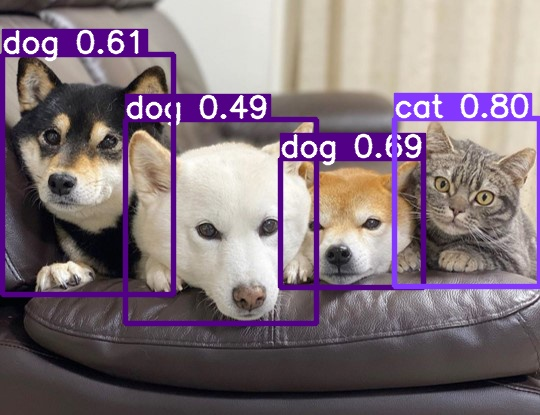

In [9]:
from IPython.display import Image
Image('./runs/detect/predict/object_detection.jpg')